In [1]:
import numpy as np
import pandas as pd

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

torch.__version__, fastai.__version__

('1.11.0', '2.7.9')

In [2]:
# data
path = Path('../input/pnevmoniya/train/')

fls = get_image_files(path)

In [3]:
# Data Block yaratib olamiz
pnevmoniya = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),    # kategoriyalarga ajratish uchun
                        get_items=get_image_files,    # fayllarni qayerdan olishini ko'rsatamiz
                        splitter=RandomSplitter(valid_pct=0.2, seed=12),  # seed-random state, train_size=0.8, test_size=0.2
                        get_y=parent_label,   # rasmlarni bo'lganda fastai o'zi yorliq berib ketadi
                        item_tfms=Resize(224) # rasmlar o'lchamini o'zgartirish
                        )

In [4]:
# # lebillovchi funksiya
# def is_pnevmoniya(x): return x[0].isupper()

# # datalarni yukllovchi(dataloader)
# dls = ImageDataLoaders.from_name_func(
#     path, get_image_files(path), #valid = 0.2, seed=42,
#     label_func=is_pnevmoniya#, item_tfms=Resize(224)
# )

In [5]:
# Data Loader yaratib olamiz
dls = pnevmoniya.dataloaders(path)

In [6]:
failed = verify_images(path)
failed

zip argument #1 must support iteration


(#0) []

In [7]:
# dls.train.show_batch(max_n=16, nrows=2)

In [8]:
# o'qitish(training)
# learn = cnn_learner(dls, resnet34, metrics=accuracy)    # cnn_learner  modelning nomi >> vision_learner ga o'zgargan
# learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

# resnet34

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

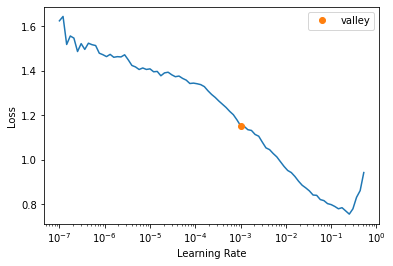

In [19]:
# model resnet34 ni o'qitishga tayyorgarlik
learn = vision_learner(dls, resnet34, metrics=accuracy)   #  fine_tune= 6 - , accuracy 0.993289 >> 0.

# train tezligini aniqlash: resnet34  -- modeli uchun
learn.lr_find()

In [ ]:
# model resnet50 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
# learn = learn.fine_tune(6, 0.001)
# learn

# resnet50

SuggestedLRs(valley=0.0006918309954926372)

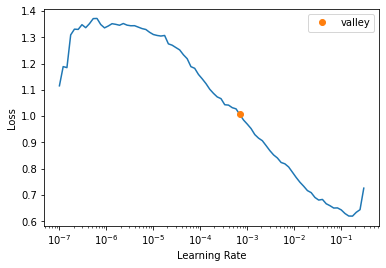

In [18]:
# model resnet50 ni o'qitishga tayyorgarlik
learn = vision_learner(dls, resnet50, metrics=accuracy)   #  fine_tune= 4 - 6 - 7 - 10, accuracy 0.990412 >> 0.9932 >> 0.991371 >> 0.990412

# train tezligini aniqlash: resnet50  -- modeli uchun
learn.lr_find()

In [ ]:
# model resnet50 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
# learn = learn.fine_tune(6, 0.00069)
# learn

# resnet101

SuggestedLRs(valley=0.0010000000474974513)

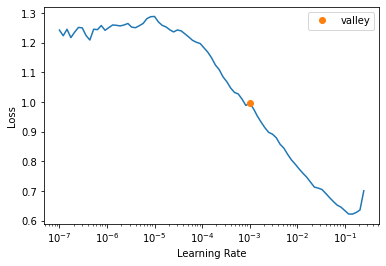

In [9]:
# model resnet101 ni o'qitishga tayyorgarlik
learn = vision_learner(dls, resnet101, metrics=accuracy)   #  fine_tune= 6 - , accuracy 0.993289 >> 0.

# train tezligini aniqlash: resnet101  -- modeli uchun
learn.lr_find()

In [ ]:
# model resnet101 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
# learn = learn.fine_tune(6, 0.001)
# learn

# resnet152

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

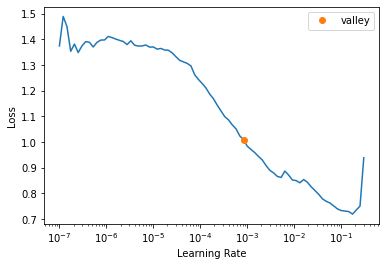

In [20]:
# model resnet152 ni o'qitishga tayyorgarlik
learn = vision_learner(dls, resnet152, metrics=accuracy)     #  fine_tune= 4 - 6, accuracy 0.991371 >> 0.

# train tezligini aniqlash: resnet152  -- modeli uchun
learn.lr_find()

In [10]:
# model resnet152 ni tafsiya qilingan(aniqlangan) learning tezligi bilan o'qitish
# learn = learn.fine_tune(6, 0.0083)
# learn

In [11]:
# # 
# learn.show_results()

In [12]:
# interp = Interpretation.from_learner(learn)
# interp.plot_top_losses(9)

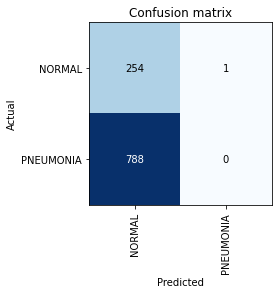

In [13]:
# Tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
# Rasm yuklash uchun widget(tugma)

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [15]:
# img = PILImage.create(upload.data[-1])    # rasm
# pred, pred_id, prob = learn.predict(img)    # bashorat qilish (predict)
# print(f"Pnevmoniyami?: {pred}")
# print(f"Ehtimollig: {int(prob[pred_id].item())*100}%")
# print(f"Ehtimollig: {prob[pred_id].item():.3f}")    
# img

In [16]:
prob

NameError: name 'prob' is not defined

In [ ]:
pred

In [ ]:
# # modelni saqlab olish
# with open('RFC_model.pkl','wb') as f:
#     pickle.dump(RFC_model, f)

In [ ]:
# y_pred_rfc = RFC_model.predict(test_data_prepared)

# sample_submission['satisfaction'] = y_pred_rfc
# sample_submission

In [ ]:
# sample_submission.to_csv("sample_submission.csv", index=False)